1) Importing Libraries

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

2. Creating dummy dataset

In [4]:
data = {
    'SleepHours': [6, 7, 5, 8, 6, 7, 9, 5, 6, 8, 7, 6, 5, 9],
    'DailySteps': [4000, 7000, 3000, 10000, 5000, 6500, 12000, 3500, 4500, 9000, 8000, 5200, 2800, 11000],
    'CaloriesIntake': [2500, 2200, 2800, 2000, 2600, 2300, 1900, 3000, 2700, 2100, 2200, 2400, 3100, 2000],
    'BMI': [28, 24, 30, 22, 27, 25, 21, 31, 29, 23, 24, 26, 32, 22]
}

df = pd.DataFrame(data)
print("Original Dataset:\n", df)

Original Dataset:
     SleepHours  DailySteps  CaloriesIntake  BMI
0            6        4000            2500   28
1            7        7000            2200   24
2            5        3000            2800   30
3            8       10000            2000   22
4            6        5000            2600   27
5            7        6500            2300   25
6            9       12000            1900   21
7            5        3500            3000   31
8            6        4500            2700   29
9            8        9000            2100   23
10           7        8000            2200   24
11           6        5200            2400   26
12           5        2800            3100   32
13           9       11000            2000   22


3. Visualisation of data

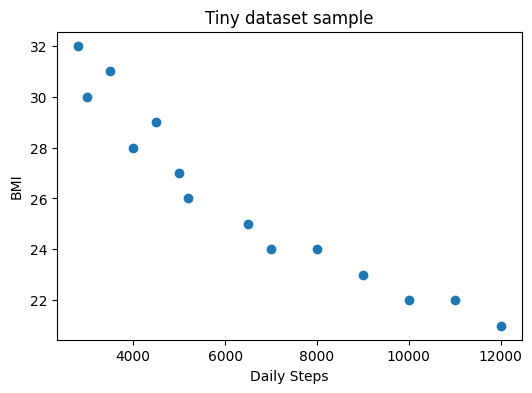

In [5]:
plt.figure(figsize=(6,4))
plt.scatter(df["DailySteps"], df["BMI"], label="BMI vs Steps")
plt.xlabel("Daily Steps")
plt.ylabel("BMI")
plt.title("Tiny dataset sample")
plt.show()

4. Normalising features

In [6]:
features = df[['SleepHours', 'DailySteps', 'CaloriesIntake']].values
target = df['BMI'].values.reshape(-1, 1)

scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(features)
y_scaled = scaler_y.fit_transform(target)

X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y_scaled, dtype=torch.float32)

5. Defining a minimal linear model

In [7]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(3, 1)  # 3 input features → 1 output
    def forward(self, x):
        return self.linear(x)

model = LinearRegressionModel()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.05)

6. Training model

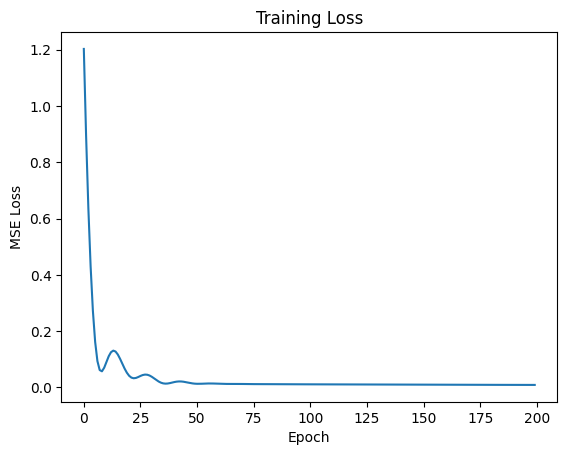

In [8]:
losses = []
for epoch in range(200):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_tensor)
    loss = criterion(outputs, y_tensor)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

# Plot training loss
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Training Loss")
plt.show()

7. Evaluation on the training set (since dataset is tiny)

In [9]:
model.eval()
with torch.no_grad():
    y_pred_scaled = model(X_tensor).numpy()

# Inverse scaling to get actual BMI predictions
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_true = target

mse = mean_squared_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print(f"Final MSE: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Final MSE: 0.11
R² Score: 0.99


8. Prediction for new sample data

In [10]:
new_data = np.array([[7, 7000, 2200]])  # Example input
new_data_scaled = scaler_X.transform(new_data)
new_data_tensor = torch.tensor(new_data_scaled, dtype=torch.float32)

with torch.no_grad():
    new_pred_scaled = model(new_data_tensor).numpy()
    new_pred = scaler_y.inverse_transform(new_pred_scaled)

print(f"Predicted BMI for [7h sleep, 7000 steps, 2200 cal] = {new_pred[0][0]:.2f}")

Predicted BMI for [7h sleep, 7000 steps, 2200 cal] = 24.28


9. Health Dashboard (Creative add-on)

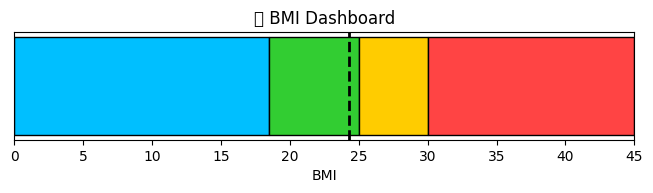

✅ Normal weight (BMI=24.28)
- Keep balanced diet
- Maintain regular activity & sleep


In [17]:
def health_tips(bmi: float) -> str:
    if bmi < 18.5:
        return (f"⚠️ Underweight (BMI={new_pred[0][0]:.2f})\n- Eat nutrient-dense foods\n- Increase protein & strength training\n- Consider small frequent meals")
    elif 18.5 <= bmi < 25:
        return (f"✅ Normal weight (BMI={new_pred[0][0]:.2f})\n- Keep balanced diet\n- Maintain regular activity & sleep")
    elif 25 <= bmi < 30:
        return (f"⚠️ Overweight (BMI={new_pred[0][0]:.2f})\n- Reduce processed food\n- Increase steps & cardio\n- Watch portions")
    else:
        return (f"❌ Obese (BMI={new_pred[0][0]:.2f})\n- Consult professional\n- Favor low-impact cardio\n- Structured diet plan")

def bmi_dashboard(bmi: float):
    colors = ["#00bfff", "#32cd32", "#ffcc00", "#ff4444"]
    bounds = [0, 18.5, 25, 30, 45]
    widths = [bounds[i+1]-bounds[i] for i in range(len(bounds)-1)]
    plt.figure(figsize=(8,1.4))
    left = 0
    for w, c in zip(widths, colors):
        plt.barh(0, w, left=left, color=c, edgecolor="black")
        left += w
    plt.axvline(bmi, color="black", linestyle="--", linewidth=2)
    plt.xlim(0,45)
    plt.yticks([])
    plt.xlabel("BMI")
    plt.title("📊 BMI Dashboard")
    plt.show()
    print(health_tips(bmi))

bmi_dashboard(new_pred)